In [18]:
# Import libraries and tools for the project

In [173]:
from data_download import *

import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

import scipy

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm
import statsmodels.formula.api as smf

from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import linear_rainbow, het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import LabelEncoder

In [ ]:
# import data using pre defined source code functions 

In [51]:
import sys

In [52]:
sys.path.insert(0, "../src")

In [53]:
import data_download

In [54]:
data_dict = data_download.get_dataframes()

Successfully downloaded ZIP file
    https://aqua.kingcounty.gov/extranet/assessor/Parcel.zip
    
Successfully downloaded ZIP file
    https://aqua.kingcounty.gov/extranet/assessor/Residential%20Building.zip
    


/Applications/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Successfully downloaded ZIP file
    https://aqua.kingcounty.gov/extranet/assessor/Real%20Property%20Sales.zip
    


/Applications/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: DtypeWarning: Columns (1,2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Successfully downloaded ZIP file
    https://aqua.kingcounty.gov/extranet/assessor/Lookup.zip
    


In [55]:
# start to look into the data

In [56]:
data_dict['res_bldg'].columns

Index(['Major', 'Minor', 'BldgNbr', 'NbrLivingUnits', 'Address',
       'BuildingNumber', 'Fraction', 'DirectionPrefix', 'StreetName',
       'StreetType', 'DirectionSuffix', 'ZipCode', 'Stories', 'BldgGrade',
       'BldgGradeVar', 'SqFt1stFloor', 'SqFtHalfFloor', 'SqFt2ndFloor',
       'SqFtUpperFloor', 'SqFtUnfinFull', 'SqFtUnfinHalf', 'SqFtTotLiving',
       'SqFtTotBasement', 'SqFtFinBasement', 'FinBasementGrade',
       'SqFtGarageBasement', 'SqFtGarageAttached', 'DaylightBasement',
       'SqFtOpenPorch', 'SqFtEnclosedPorch', 'SqFtDeck', 'HeatSystem',
       'HeatSource', 'BrickStone', 'ViewUtilization', 'Bedrooms',
       'BathHalfCount', 'Bath3qtrCount', 'BathFullCount', 'FpSingleStory',
       'FpMultiStory', 'FpFreestanding', 'FpAdditional', 'YrBuilt',
       'YrRenovated', 'PcntComplete', 'Obsolescence', 'PcntNetCondition',
       'Condition', 'AddnlCost'],
      dtype='object')

In [57]:
data_dict.keys()

dict_keys(['parcel', 'res_bldg', 'rp_sale', 'lookup'])

In [58]:
# Merge our data into one useful data frame

In [59]:
combo = data_dict['rp_sale'].merge(data_dict['res_bldg'], on = ['Major','Minor'])
combo = combo.merge(data_dict['parcel'], on = ['Major','Minor'])

In [60]:
# investigate the data

In [61]:
combo.shape

(1462954, 151)

In [96]:
combo.head()

,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,PlatLot_x,PlatBlock_x,SellerName,BuyerName,PropertyType,PrincipalUse,SaleInstrument,AFForestLand,AFCurrentUseLand,AFNonProfitUse,AFHistoricProperty,SaleReason,PropertyClass,SaleWarning,BldgNbr,NbrLivingUnits,Address,BuildingNumber,Fraction,DirectionPrefix,StreetName,StreetType,DirectionSuffix,ZipCode,Stories,BldgGrade,BldgGradeVar,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtUnfinFull,SqFtUnfinHalf,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,FinBasementGrade,SqFtGarageBasement,SqFtGarageAttached,DaylightBasement,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,HeatSystem,HeatSource,BrickStone,ViewUtilization,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,FpSingleStory,FpMultiStory,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,PcntComplete,Obsolescence,PcntNetCondition,Condition,AddnlCost,PropName,PlatName,PlatLot_y,PlatBlock_y,Range,Township,Section,QuarterSection,PropType,Area,SubArea,SpecArea,SpecSubArea,DistrictName,LevyCode,CurrentZoning,HBUAsIfVacant,HBUAsImproved,PresentUse,SqFtLot,WaterSystem,SewerSystem,Access,Topography,StreetSurface,RestrictiveSzShape,InadequateParking,PcntUnusable,Unbuildable,MtRainier,Olympics,Cascades,Territorial,SeattleSkyline,PugetSound,LakeWashington,LakeSammamish,SmallLakeRiverCreek,OtherView,WfntLocation,WfntFootage,WfntBank,WfntPoorQuality,WfntRestrictedAccess,WfntAccessRights,WfntProximityInfluence,TidelandShoreland,LotDepthFactor,TrafficNoise,AirportNoise,PowerLines,OtherNuisances,NbrBldgSites,Contamination,DNRLease,AdjacentGolfFairway,AdjacentGreenbelt,HistoricSite,CurrentUseDesignation,NativeGrowthProtEsmt,Easements,OtherDesignation,DeedRestrictions,DevelopmentRightsPurch,CoalMineHazard,CriticalDrainage,ErosionHazard,LandfillBuffer,HundredYrFloodPlain,SeismicHazard,LandslideHazard,SteepSlopeHazard,Stream,Wetland,SpeciesOfConcern,SensitiveAreaTract,WaterProblems,TranspConcurrency,OtherProblems
1,1365300,98400,380,03/23/1994,139950,199403281030,080,089,098400,P,38,,WIXOM JACK L+GRACE E ...,DWORSHAK MICHAEL J ...,3,0,2,N,N,N,N,1,8,,1,1,12713 SE 188TH PL 98058,12713,,SE,188TH,PL,,98058,1.0,7,0,1300,0,0,0,0,0,2050,1250,750,6,500,0,Y,0,0,260,5,2,0,N,4,1,1,1,0,1,0,1,1967,0,0,0,0,4,0,,BOULEVARD LANE DIV NO. 01,38,,5,23,33,SE,R,51.0,6.0,NaN,NaN,KING COUNTY,5103,R6,1,1,2,8643,2,2,4,0,1,0,2,0,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,N,N,0,0,0,0,N,N,0,0,N,N,N,0,0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N
2,2856017,98400,380,03/29/2017,439500,20170330001397,,,,,,,DWORSHAK MICHAEL J ...,BERGSTROM AGATA ...,11,6,3,,,,,1,8,,1,1,12713 SE 188TH PL 98058,12713,,SE,188TH,PL,,98058,1.0,7,0,1300,0,0,0,0,0,2050,1250,750,6,500,0,Y,0,0,260,5,2,0,N,4,1,1,1,0,1,0,1,1967,0,0,0,0,4,0,,BOULEVARD LANE DIV NO. 01,38,,5,23,33,SE,R,51.0,6.0,NaN,NaN,KING COUNTY,5103,R6,1,1,2,8643,2,2,4,0,1,0,2,0,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,N,N,0,0,0,0,N,N,0,0,N,N,N,0,0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N
4,2548641,330395,1610,06/07/2012,335000,20120615000867,,,,,,,THORSON CONNIE+TODD ...,YATTEAU PAUL A+TAMARA J ...,3,6,3,N,N,N,N,1,8,,1,1,23024 SE 247TH CT 98038,23024,,SE,247TH,CT,,98038,2.0,8,0,1260,0,950,0,0,0,2210,0,0,0,0,650,,60,0,500,5,2,0,,3,0,1,2,0,1,0,0,1994,0,0,0,0,3,4500,,HIGHLANDS AT LAKE WILDERNESS,161,,6,22,22,NW,R,56.0,4.0,NaN,NaN,MAPLE VALLEY,1818,R-6,1,1,2,8270,2,2,4,0,1,0,0,0,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,N,N,0,0,0,0,N,N,0,0,N,N,N,0,0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N
5,2629836,330395,1610,08/26/2013,369900,20130912001685,,,,,,,NATIONAL RESIDENTIAL NOMINEE SEVICES INC ...,WILMOTH JASON+JENENE ...,3,6,4,N,N,N,N,1,8,41,1,1,23024 SE 247TH CT 98038,23024,,SE,247TH,CT,,98038,2.0,8,0,1260,0,950,0,0,0,2210,0,0,0,0,650,,60,0,500,5,2,0,,3,0,1,2,0,1,0,0,1994,0,0,0,0,3,4500,,HIGHLANDS AT LAKE WILDERNESS,161,,6,22,22,NW,R,56.0,4.0,NaN,NaN,MAPLE VALLEY,1818,R-6,1,1,2,8270,2,2,4,0,1,0,0,0,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,N,N,0,0,0,0,N,N,0,0,N,N,N,0,0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N
6,1383812,330395,1610,06

In [63]:
# Reduce our overall data to sale price greater than $120k and less than $5mm

In [64]:
combo = combo[(combo['SalePrice'] > 120000) & (combo['SalePrice'] < 5000000)]
combo.describe()

,ExciseTaxNbr,SalePrice,PropertyType,PrincipalUse,SaleInstrument,SaleReason,PropertyClass,BldgNbr,NbrLivingUnits,Stories,BldgGrade,BldgGradeVar,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtUnfinFull,SqFtUnfinHalf,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,FinBasementGrade,SqFtGarageBasement,SqFtGarageAttached,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,HeatSystem,HeatSource,BrickStone,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,FpSingleStory,FpMultiStory,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,PcntComplete,Obsolescence,PcntNetCondition,Condition,AddnlCost,Range,Township,Section,Area,SubArea,SpecArea,SpecSubArea,LevyCode,HBUAsIfVacant,HBUAsImproved,PresentUse,SqFtLot,WaterSystem,SewerSystem,Access,Topography,StreetSurface,RestrictiveSzShape,InadequateParking,PcntUnusable,MtRainier,Olympics,Cascades,Territorial,SeattleSkyline,PugetSound,LakeWashington,LakeSammamish,SmallLakeRiverCreek,OtherView,WfntLocation,WfntFootage,WfntBank,WfntPoorQuality,WfntRestrictedAccess,TidelandShoreland,LotDepthFactor,TrafficNoise,AirportNoise,NbrBldgSites,Contamination,HistoricSite,CurrentUseDesignation
count,8.387080e+05,8.387080e+05,838708.000000,838708.000000,838708.000000,838708.000000,838708.000000,838708.000000,838708.000000,838708.000000,838708.000000,838708.000000,838708.000000,838708.000000,838708.000000,838708.000000,838708.000000,838708.000000,838708.000000,838708.000000,838708.000000,838708.000000,838708.000000,838708.000000,838708.000000,838708.000000,838708.000000,838708.000000,838708.000000,838708.000000,838708.000000,838708.000000,838708.000000,838708.000000,838708.000000,838708.000000,838708.000000,838708.000000,838708.000000,838708.000000,838708.000000,838708.000000,838708.000000,838708.000000,8.387080e+05,838708.000000,838708.000000,838708.000000,838708.000000,838708.000000,0.0,0.0,838708.000000,838708.000000,838708.000000,838708.000000,8.387080e+05,838708.000000,838708.000000,838708.000000,838708.000000,838708.000000,838708.000000,838708.000000,838708.00000,838708.000000,838708.000000,838708.000000,838708.000000,838708.000000,838708.000000,838708.000000,838708.000000,838708.000000,838708.000000,838708.000000,838708.000000,838708.000000,838708.000000,838708.000000,838708.000000,838708.000000,838708.000000,838708.0,838708.000000,838708.000000,838708.000000,838708.000000
mean,2.150375e+06,4.746420e+05,3.595880,5.387398,3.600787,1.829017,7.815432,1.015009,1.017662,1.532290,7.779751,0.007798,1301.919911,45.886692,551.101138,8.818449,0.619300,0.506685,2214.456134,481.432371,307.890703,2.862686,83.586482,292.036033,71.356869,5.313541,136.616863,4.941601,2.071865,3.530774,3.461213,0.521768,0.477743,1.630567,0.648707,0.337083,0.064614,0.173624,1974.322273,97.977160,0.221954,0.086255,0.004842,3.434618,6.975287e+02,4.629535,23.896442,18.432819,48.555969,5.796895,NaN,NaN,1623.242404,1.118436,1.007173,4.071974,1.733941e+04,1.972920,1.861758,3.936639,0.085521,1.016488,0.004049,1.233725,0.00506,0.023517,0.067209,0.067699,0.258277,0.023852,0.066260,0.067152,0.017992,0.025161,0.012412,0.116836,1.637771,0.025273,0.000708,0.006136,0.016376,0.070351,0.201368,0.0,0.007515,0.001042,0.001037,0.006979
std,5.526178e+05,4.690353e+05,3.674434,1.837466,3.479845,3.125851,1.035423,0.259657,0.154482,0.516347,1.205054,0.851572,506.255451,167.822341,667.872794,77.986053,21.499528,16.489056,980.807257,593.820088,464.559075,3.601750,187.093651,300.597360,125.859544,39.263053,217.952444,0.920022,0.538697,16.785911,0.926976,0.537917,0.641607,0.701363,0.645858,0.516893,0.258505,0.398105,29.574308,431.559393,4.034064,1.881518,0.478798,0.656064,3.804743e+03,1.109269,1.631255,10.249356,26.668530,4.046453,NaN,NaN,1874.600913,0.818100,0.105725,13.123201,6.394567e+04,0.164019,0.346399,0.261184,0.279655,0.172825,0.063504,0.971799,0.58350,0.254657,0.425060,0.410830,0.799577,0.256085,0.423163,0.424061,0.229629,0.274620,0.173795,0.906655,20.498400,0.213151,0.026603,0.114442,0.178990,2.836404,0.549203,0.0,0.310615,0.218940,0.055324,0.137497
min,6.63

In [65]:
combo.shape

(838708, 151)

In [66]:
# look for high and low correlations using combo.corr method

In [67]:
correlations = combo.corr()['SalePrice']

In [68]:
high_corrs = correlations.sort_values(ascending = False).head(20)
low_corrs = correlations.sort_values(ascending = True).head(20)

In [69]:
high_corrs

SalePrice             1.000000
SqFtTotLiving         0.405655
BldgGrade             0.400214
ExciseTaxNbr          0.341170
SqFt2ndFloor          0.340509
Stories               0.252151
BathFullCount         0.249100
SqFt1stFloor          0.219188
SqFtOpenPorch         0.207273
LakeWashington        0.189170
Bedrooms              0.185107
BathHalfCount         0.183472
YrBuilt               0.181979
Territorial           0.177714
PrincipalUse          0.163496
FpSingleStory         0.163428
SqFtGarageAttached    0.158833
TidelandShoreland     0.149493
Township              0.123190
SqFtFinBasement       0.112772
Name: SalePrice, dtype: float64

In [70]:
low_corrs

Condition          -0.065925
PropertyClass      -0.047540
FpFreestanding     -0.043503
Access             -0.037372
StreetSurface      -0.026807
SubArea            -0.023216
SaleReason         -0.022406
SaleInstrument     -0.020466
TrafficNoise       -0.017777
LevyCode           -0.010373
HBUAsIfVacant      -0.010319
NbrLivingUnits     -0.009093
HeatSource         -0.004997
HBUAsImproved      -0.004317
PcntNetCondition   -0.000704
SqFtUnfinHalf       0.000937
PcntUnusable        0.001031
Obsolescence        0.003683
Contamination       0.003882
WaterSystem         0.004602
Name: SalePrice, dtype: float64

In [72]:
# Look at a correlation matrix

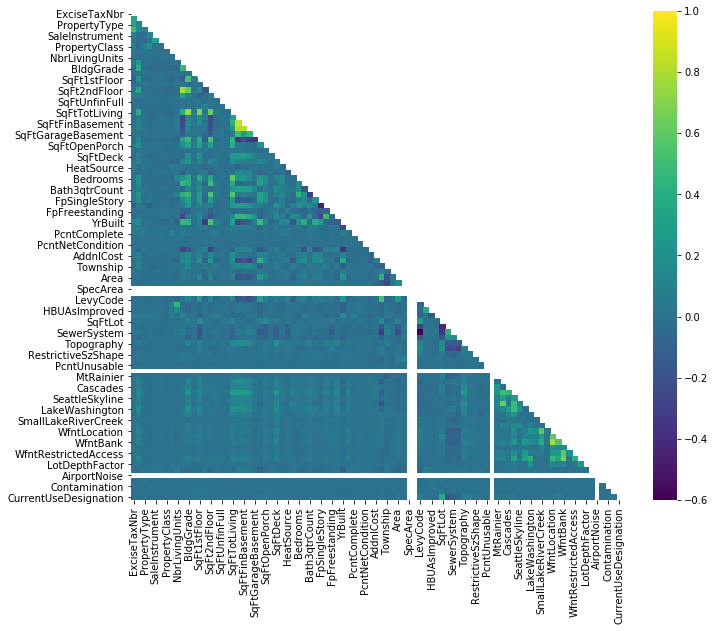

In [73]:
corr = combo.corr()
# The mask is not necessary, but corr() has duplicate values on either side of the diagonal
mask = np.triu(np.ones_like(corr, dtype=np.bool))

fig1, ax1 = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, mask=mask, ax=ax1, cmap="viridis");

In [74]:
# start building some simple modes with different predictors

In [87]:
formula = 'SalePrice ~ SqFtTotLiving'
model = smf.ols(formula = formula, data = combo).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.165
Method:                 Least Squares   F-statistic:                 1.652e+05
Date:                Tue, 29 Sep 2020   Prob (F-statistic):               0.00
Time:                        07:49:09   Log-Likelihood:            -1.2067e+07
No. Observations:              838708   AIC:                         2.413e+07
Df Residuals:                  838706   BIC:                         2.413e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      4.506e+04   1155.950     38.981      0.000    4.28e+04    4.73e+04
SqFtTotLiving   193.9897      0.477    406.446      0.000     193.054     194.925
==============================================================================
Omnibus:                   721572.101   Durbin-Watson:                   1.842
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         27175038.120
Skew:                           4.043   Prob(JB):                         0.00
Kurtosis:                      29.688   Cond. No.                     5.98e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.98e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [88]:
formula = 'SalePrice ~ BldgGrade'
model = smf.ols(formula = formula, data = combo).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.160
Model:                            OLS   Adj. R-squared:                  0.160
Method:                 Least Squares   F-statistic:                 1.600e+05
Date:                Tue, 29 Sep 2020   Prob (F-statistic):               0.00
Time:                        07:53:00   Log-Likelihood:            -1.2069e+07
No. Observations:              838708   AIC:                         2.414e+07
Df Residuals:                  838706   BIC:                         2.414e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7.372e+05   3066.221   -240.436      0.000   -7.43e+05   -7.31e+05
BldgGrade   1.558e+05    389.484    399.947      0.000    1.55e+05    1.57e+05
==============================================================================
Omnibus:                   738948.075   Durbin-Watson:                   1.829
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         28547488.177
Skew:                           4.193   Prob(JB):                         0.00
Kurtosis:                      30.324   Cond. No.                         52.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [83]:
formula = 'SalePrice ~ Bedrooms'
model = smf.ols(formula = formula, data = combo).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                 2.976e+04
Date:                Mon, 28 Sep 2020   Prob (F-statistic):               0.00
Time:                        18:15:50   Log-Likelihood:            -1.2128e+07
No. Observations:              838708   AIC:                         2.426e+07
Df Residuals:                  838706   BIC:                         2.426e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.505e+05   1945.502     77.338      0.000    1.47e+05    1.54e+05
Bedrooms    9.366e+04    542.952    172.504      0.000    9.26e+04    9.47e+04
==============================================================================
Omnibus:                   713360.166   Durbin-Watson:                   1.701
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         22219559.797
Skew:                           4.052   Prob(JB):                         0.00
Kurtosis:                      26.878   Cond. No.                         14.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
formula = 'SalePrice ~ LakeWashington'
model = smf.ols(formula = formula, data = combo).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                 3.113e+04
Date:                Mon, 28 Sep 2020   Prob (F-statistic):               0.00
Time:                        18:16:51   Log-Likelihood:            -1.2127e+07
No. Observations:              838708   AIC:                         2.425e+07
Df Residuals:                  838706   BIC:                         2.425e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       4.606e+05    509.173    904.588      0.000     4.6e+05    4.62e+05
LakeWashington  2.092e+05   1185.930    176.429      0.000    2.07e+05    2.12e+05
==============================================================================
Omnibus:                   707817.432   Durbin-Watson:                   1.693
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         21689441.430
Skew:                           4.009   Prob(JB):                         0.00
Kurtosis:                      26.588   Cond. No.                         2.37
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
formula = 'SalePrice ~ SqFtGarageAttached'
model = smf.ols(formula = formula, data = combo).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                 2.171e+04
Date:                Mon, 28 Sep 2020   Prob (F-statistic):               0.00
Time:                        17:59:00   Log-Likelihood:            -1.2132e+07
No. Observations:              838708   AIC:                         2.426e+07
Df Residuals:                  838706   BIC:                         2.426e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           4.023e+05    704.991    570.597      0.000    4.01e+05    4.04e+05
SqFtGarageAttached   247.8334      1.682    147.331      0.000     244.536     251.130
==============================================================================
Omnibus:                   707446.468   Durbin-Watson:                   1.696
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         21163111.602
Skew:                           4.016   Prob(JB):                         0.00
Kurtosis:                      26.261   Cond. No.                         584.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
formula = 'SalePrice ~ SqFtGarageBasement'
model = smf.ols(formula = formula, data = combo).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     36.75
Date:                Mon, 28 Sep 2020   Prob (F-statistic):           1.34e-09
Time:                        17:59:00   Log-Likelihood:            -1.2142e+07
No. Observations:              838708   AIC:                         2.428e+07
Df Residuals:                  838706   BIC:                         2.428e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           4.733e+05    560.930    843.697      0.000    4.72e+05    4.74e+05
SqFtGarageBasement    16.5945      2.737      6.062      0.000      11.229      21.960
==============================================================================
Omnibus:                   713844.549   Durbin-Watson:                   1.669
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         21567174.537
Skew:                           4.070   Prob(JB):                         0.00
Kurtosis:                      26.471   Cond. No.                         224.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [78]:
formula = 'SalePrice ~ YrBuilt'
model = smf.ols(formula = formula, data = combo).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                 2.873e+04
Date:                Mon, 28 Sep 2020   Prob (F-statistic):               0.00
Time:                        17:59:01   Log-Likelihood:            -1.2128e+07
No. Observations:              838708   AIC:                         2.426e+07
Df Residuals:                  838706   BIC:                         2.426e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.223e+06   3.36e+04   -155.353      0.000   -5.29e+06   -5.16e+06
YrBuilt     2886.1128     17.028    169.488      0.000    2852.738    2919.488
==============================================================================
Omnibus:                   705246.212   Durbin-Watson:                   1.703
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         20839020.498
Skew:                           4.002   Prob(JB):                         0.00
Kurtosis:                      26.071   Cond. No.                     1.32e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [79]:
formula = 'SalePrice ~ SeattleSkyline'
model = smf.ols(formula = formula, data = combo).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     7811.
Date:                Mon, 28 Sep 2020   Prob (F-statistic):               0.00
Time:                        17:59:02   Log-Likelihood:            -1.2138e+07
No. Observations:              838708   AIC:                         2.428e+07
Df Residuals:                  838706   BIC:                         2.428e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       4.704e+05    511.992    918.853      0.000    4.69e+05    4.71e+05
SeattleSkyline  1.759e+05   1990.692     88.381      0.000    1.72e+05     1.8e+05
==============================================================================
Omnibus:                   713135.487   Durbin-Watson:                   1.676
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         21689952.261
Skew:                           4.061   Prob(JB):                         0.00
Kurtosis:                      26.552   Cond. No.                         3.91
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
# Make a pair plot with those that are more correlated with sale price

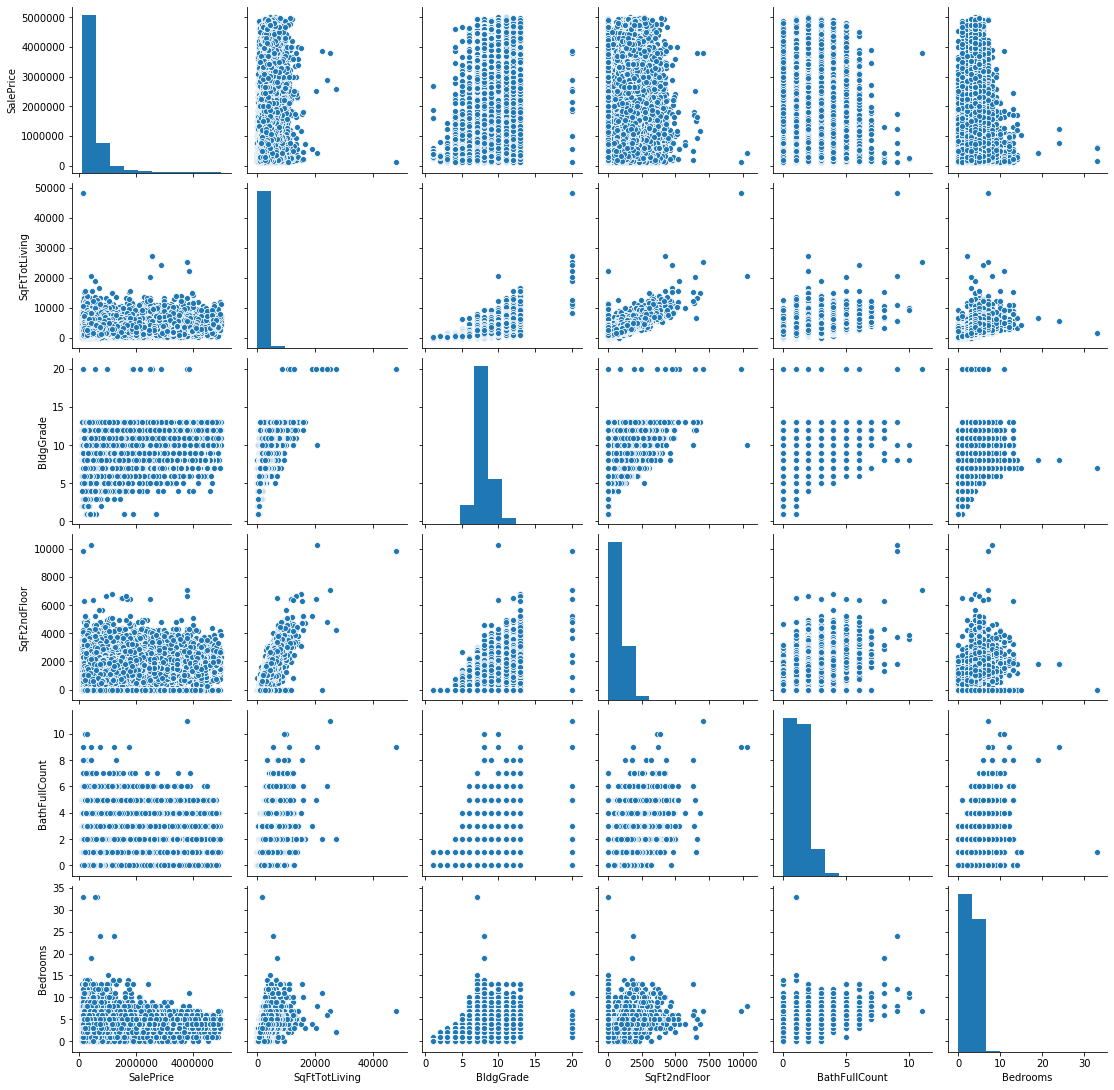

In [86]:
positively_correlated_cols = ['SalePrice','SqFtTotLiving', 'BldgGrade', 'SqFt2ndFloor', 'BathFullCount', 'Bedrooms']
positively_correlated_df = combo[positively_correlated_cols]
sns.pairplot(positively_correlated_df);

In [91]:
formula = 'SalePrice ~ SeattleSkyline + TrafficNoise'
model = smf.ols(formula = formula, data = combo).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     4042.
Date:                Tue, 29 Sep 2020   Prob (F-statistic):               0.00
Time:                        08:00:56   Log-Likelihood:            -1.2138e+07
No. Observations:              838708   AIC:                         2.428e+07
Df Residuals:                  838705   BIC:                         2.428e+07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       4.735e+05    544.946    868.918      0.000    4.72e+05    4.75e+05
SeattleSkyline   1.76e+05   1990.374     88.406      0.000    1.72e+05     1.8e+05
TrafficNoise   -1.524e+04    928.080    -16.418      0.000   -1.71e+04   -1.34e+04
==============================================================================
Omnibus:                   712816.038   Durbin-Watson:                   1.677
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         21648989.404
Skew:                           4.059   Prob(JB):                         0.00
Kurtosis:                      26.529   Cond. No.                         4.02
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#'SalePrice', PropertyType exclude apartments, SqFtTotLiving, SqFt2ndFloor, SqFt1stFloor, SqFtOpenPorch, SqFtEnclosedPorch
# do we need all of the SqFts? SqFtLot vs SqFt1stFloor for Q 4?

In [121]:
combo['SqFtPorch'] =(combo['SqFtEnclosedPorch'] + combo['SqFtOpenPorch'])
porch = combo.loc[combo['SqFtPorch'] > 0, :]

In [179]:
porch['house_to_lot'] =(porch['SqFtLot'] / porch['SqFtTotLiving'])
house = porch.loc[porch['house_to_lot'] > 0, :]
#house

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [180]:
new_combo = house[['SalePrice','SqFtTotLiving','SqFtPorch','house_to_lot' ,'BldgGrade']]
new_combo

,SalePrice,SqFtTotLiving,SqFtPorch,house_to_lot,BldgGrade
4,335000,2210,60,3.742081,8
5,369900,2210,60,3.742081,8
6,192950,2210,60,3.742081,8
7,530000,2210,60,3.742081,8
8,369900,2210,60,3.742081,8
...,...,...,...,...,...
1462942,270000,940,100,17.989362,7
1462943,300000,1030,120,3.592233,7
1462944,303300,1890,50,5.952381,8
1462950,591000,4410,230,1.133787,9


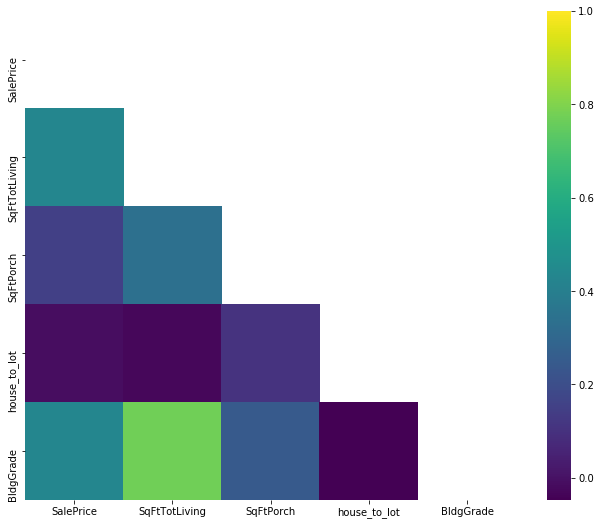

In [181]:
corr = new_combo.corr()
# The mask is not necessary, but corr() has duplicate values on either side of the diagonal
mask = np.triu(np.ones_like(corr, dtype=np.bool))

fig1, ax1 = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, mask=mask, ax=ax1, cmap="viridis");

ValueError: supplied range of [0.2096551724137931, inf] is not finite

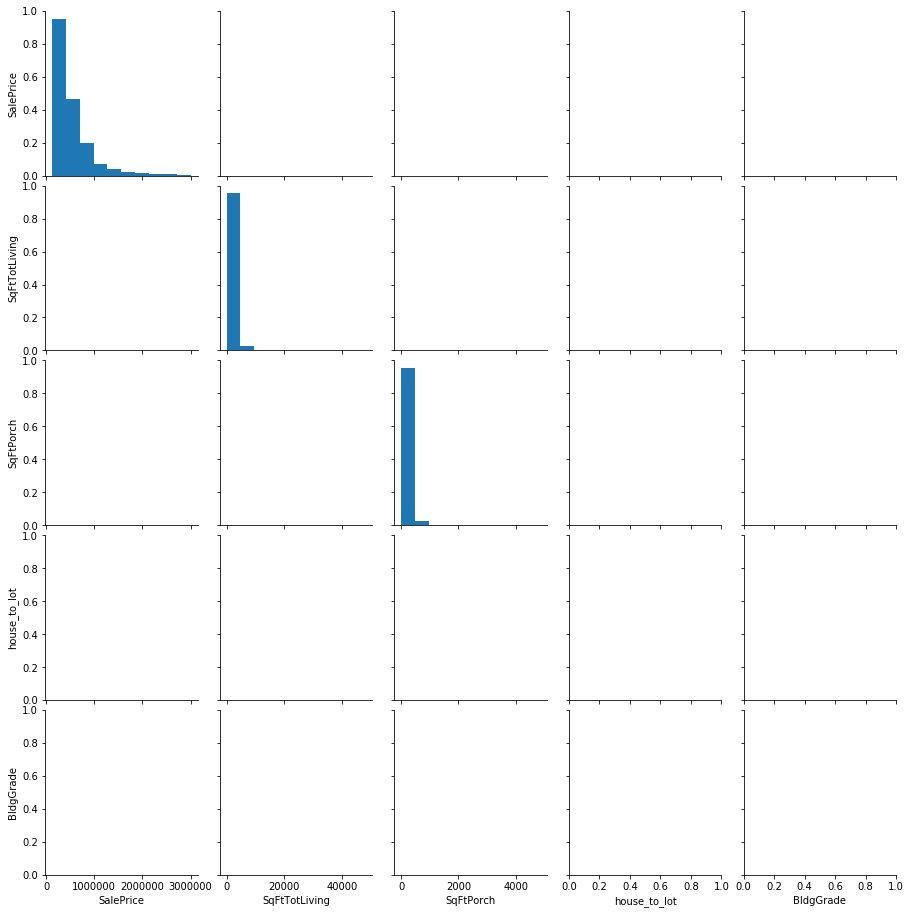

In [182]:
correlated_cols = ['SalePrice','SqFtTotLiving', 'SqFtPorch', 'house_to_lot','BldgGrade']
correlated_df = new_combo[correlated_cols]
sns.pairplot(correlated_df);

In [157]:
formula = 'SalePrice ~ SqFtTotLiving'
model = smf.ols(formula = formula, data = new_combo).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.192
Model:                            OLS   Adj. R-squared:                  0.192
Method:                 Least Squares   F-statistic:                 1.041e+05
Date:                Tue, 29 Sep 2020   Prob (F-statistic):               0.00
Time:                        12:23:12   Log-Likelihood:            -6.2273e+06
No. Observations:              436891   AIC:                         1.245e+07
Df Residuals:                  436889   BIC:                         1.245e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       7.77e+04   1457.229     53.322      0.000    7.48e+04    8.06e+04
SqFtTotLiving   174.6578      0.541    322.641      0.000     173.597     175.719
==============================================================================
Omnibus:                   219420.443   Durbin-Watson:                   1.864
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1987325.412
Skew:                           2.242   Prob(JB):                         0.00
Kurtosis:                      12.437   Cond. No.                     6.91e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.91e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [158]:
formula = 'SalePrice ~ SqFtTotLiving + SqFtPorch'
model = smf.ols(formula = formula, data = new_combo).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.192
Model:                            OLS   Adj. R-squared:                  0.192
Method:                 Least Squares   F-statistic:                 5.207e+04
Date:                Tue, 29 Sep 2020   Prob (F-statistic):               0.00
Time:                        12:23:13   Log-Likelihood:            -6.2273e+06
No. Observations:              436891   AIC:                         1.245e+07
Df Residuals:                  436888   BIC:                         1.245e+07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      7.717e+04   1460.229     52.848      0.000    7.43e+04       8e+04
SqFtTotLiving   173.5747      0.574    302.199      0.000     172.449     174.700
SqFtPorch        22.5123      3.992      5.640      0.000      14.689      30.336
==============================================================================
Omnibus:                   219277.260   Durbin-Watson:                   1.864
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1984017.996
Skew:                           2.241   Prob(JB):                         0.00
Kurtosis:                      12.429   Cond. No.                     6.94e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.94e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [164]:
formula = 'SalePrice ~ SqFtTotLiving + SqFtPorch + house_to_lot'
model = smf.ols(formula = formula, data = new_combo).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.194
Model:                            OLS   Adj. R-squared:                  0.194
Method:                 Least Squares   F-statistic:                 3.496e+04
Date:                Tue, 29 Sep 2020   Prob (F-statistic):               0.00
Time:                        12:26:28   Log-Likelihood:            -6.2270e+06
No. Observations:              436891   AIC:                         1.245e+07
Df Residuals:                  436887   BIC:                         1.245e+07
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      7.637e+04   1459.602     52.323      0.000    7.35e+04    7.92e+04
SqFtTotLiving   174.3429      0.575    303.288      0.000     173.216     175.470
SqFtPorch        40.1314      4.054      9.900      0.000      32.186      48.076
house_to_lot     -0.2024      0.008    -24.422      0.000      -0.219      -0.186
==============================================================================
Omnibus:                   219479.819   Durbin-Watson:                   1.866
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1984137.497
Skew:                           2.244   Prob(JB):                         0.00
Kurtosis:                      12.427   Cond. No.                     1.86e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.86e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [165]:
formula = 'SalePrice ~ SqFtTotLiving + SqFtPorch + house_to_lot + BldgGrade'
model = smf.ols(formula = formula, data = new_combo).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.215
Method:                 Least Squares   F-statistic:                 2.984e+04
Date:                Tue, 29 Sep 2020   Prob (F-statistic):               0.00
Time:                        12:26:45   Log-Likelihood:            -6.2212e+06
No. Observations:              436891   AIC:                         1.244e+07
Df Residuals:                  436886   BIC:                         1.244e+07
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -3.534e+05   4226.807    -83.603      0.000   -3.62e+05   -3.45e+05
SqFtTotLiving   101.5114      0.881    115.280      0.000      99.785     103.237
SqFtPorch        48.7620      4.001     12.187      0.000      40.920      56.604
house_to_lot     -0.1808      0.008    -22.099      0.000      -0.197      -0.165
BldgGrade      7.558e+04    698.908    108.144      0.000    7.42e+04     7.7e+04
==============================================================================
Omnibus:                   223005.908   Durbin-Watson:                   1.891
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1969175.787
Skew:                           2.300   Prob(JB):                         0.00
Kurtosis:                      12.328   Cond. No.                     5.53e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.53e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [166]:
rainbow_statistic, rainbow_p_value = linear_rainbow(model)
print("Rainbow statistic:", rainbow_statistic)
print("Rainbow p-value:", rainbow_p_value)

Rainbow statistic: 0.9689459536948204
Rainbow p-value: 0.9999999999999158


In [ ]:
# Linear regression assumes that the input variable linearly predicts the output variable. 
# We already qualitatively checked that with a scatter plot. 
# But I also think it's a good idea to use a statistical test.
# This one is the Rainbow test which is available from the diagnostic submodule of StatsModels
#The null hypothesis is that the model is linearly predicted by the features, 
# alternative hypothesis is that it is not. 
# Thus returning a low p-value means that the current model violates the linearity assumption.

In [178]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
from sklearn.feature_selection import RFE

lr_rfe = LinearRegression()
select = RFE(lr_rfe, n_features_to_select=3)
select = select.fit(X = new_combo.drop('SalePrice', axis=1), y = new_combo['SalePrice'])

select.support_

select.ranking_

array([1, 1, 2, 1])